## Capstone Project Working Copy

# <p style="font-size:40px ; color:blue" align="center">Capstone: Enron Emails Analysis Using NLP and Time Series</p> <sub>By Stephanie, Paige, Rajaram, Kan - 14 March 2022</sub>

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Overview  </br>
    
## Project Description: What is the morale of your company?


## Goal: 


## Support:

In [22]:
# Import Needed Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Acquire  </br>
- ???

In [ ]:
# read original df into pandas dataframe
df = pd.read_csv('emails.csv', index_col=None)
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Prepare  </br>
- ???

## See Message Body

In [ ]:
df.message.values

## Parse Emails for Date, Content

In [ ]:
from email.parser import Parser

bodies = []
dates = []
senders = []
subjects = []

# loop through email messages
for i in df.message:
    # parse and set message to email data type
    headers = Parser().parsestr(i)
    # get the body text of the email
    body = headers.get_payload()
    # get the date from email
    date = headers['Date']
    # get sender of email
    sender = headers['From']
    # get email subject
    subject = headers['Subject']
    # append date, body, sender, subjectg text to lists
    bodies.append(body)
    dates.append(date)
    senders.append(sender)
    subjects.append(subject)

In [ ]:
# show list of email text
bodies

In [ ]:
# show list of dates
dates

In [ ]:
# Set lists to dataframes
body_df = pd.DataFrame(bodies, columns = ['content'])
dates_df = pd.DataFrame(dates, columns = ['date'])
senders_df = pd.DataFrame(senders, columns = ['sender'])
subjects_df = pd.DataFrame(subjects, columns = ['subject'])

In [ ]:
body_df.head()

In [ ]:
dates_df.head()

In [ ]:
dates_df.isna().sum()

In [ ]:
senders_df.head()

In [ ]:
senders_df.isna().sum()

In [ ]:
subjects_df.head()

In [ ]:
subjects_df.isna().sum()

In [ ]:
df['date'] = dates_df
df['sender'] = senders_df
df['subject'] = subjects_df
df['content'] = body_df

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
import os
if not os.path.isfile('content.csv'):
    df.to_csv('content.csv')

In [ ]:
# # Insert those data frames into our orignal dataframe
# df.insert(1, "content", body_df)
# df.insert(1, "date", dates_df)

In [ ]:
# import os

# def content():
#     '''
#     '''
#     if os.path.isfile('content.csv'):
#         df = pd.read_csv('content.csv')

#     else:
#         from email.parser import Parser

#         bodies = []
#         dates = []

#         # loop through email messages
#         for i in df.message:
#             # parse and set message to email data type
#             headers = Parser().parsestr(i)
#             # get the body text of the email
#             body = headers.get_payload()
#             # get the date from email
#             date = headers['Date']
#             # append date and body text to lists
#             bodies.append(body)
#             dates.append(date)


#         # Set lists to dataframes
#         body_df = pd.DataFrame(bodies, columns = ['content'])
#         dates_df = pd.DataFrame(dates, columns = ['date'])

#         df['date'] = dates_df
#         df['content'] = body_df

#         df.to_csv('content')
    
#     return df

In [ ]:
import os
if not os.path.isfile('content.csv'):
    df.to_csv('content.csv')

## Clean, Tokenize, Stem, Lemmatize, StopWords, Split

### Clean

In [ ]:
import unicodedata
import re

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = string.lower()
    string = string.strip()
    string = string.replace('\n', ' ')
    string = string.replace('\t', ' ')
    string = string.replace('\r', ' ')
    string = unicodedata.normalize('NFKD', string)\
            .encode('ascii', 'ignore')\
            .decode('utf-8', 'ignore')
    string = re.sub(r"[^a-z0-9'\s]", "", string)

    return string

In [ ]:
df['clean'] = df.content.apply(basic_clean)
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
import os
if not os.path.isfile('clean.csv'):
    df.to_csv('clean.csv')

### Tolkenize

In [ ]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str = True)
    
    return string

In [ ]:
df['tokenize'] = df.clean.apply(tokenize)
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
import os
if not os.path.isfile('tokenize.csv'):
    df.to_csv('tokenize.csv')

### Stop Words

In [ ]:
from nltk.corpus import stopwords
def remove_stopwords(string, extra_words=None, exclude_words=None):
        """remove_stopwords [summary]
        Args:
            string ([type]): [description]
            extra_words ([type], optional): [description]. Defaults to None.
            exclude_words ([type], optional): [description]. Defaults to None.
        Returns:
            [type]: [description]
        """

        stopw = stopwords.words('english')

        if extra_words:
            stopw.append(word for word in extra_words)

        elif exclude_words:
            stopw.remove(word for word in exclude_words)

        words = string.split()
        filtered_words = [word for word in words if word not in stopw]

        return ' '.join(filtered_words)

In [ ]:
df['stop_words'] = df.tokenize.apply(remove_stopwords)
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
import os
if not os.path.isfile('stop_words.csv'):
    df.to_csv('stop_words.csv')

### Stemm

In [ ]:
import nltk
def stemm(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

In [ ]:
df['stemm'] = df.stop_words.apply(stemm)
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
import os
if not os.path.isfile('stemm.csv'):
    df.to_csv('stemm.csv')

### Lemm

In [ ]:
from nltk.stem import WordNetLemmatizer
def lemmatize(string):
    """lemmatize [summary]
    Args:
        string ([type]): [description]
    Returns:
        [type]: [description]
    """

    wnl = WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    return  ' '.join(lemmas)

In [ ]:
df['lemmatize'] = df.stop_words.apply(lemmatize)
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
import os
if not os.path.isfile('lemmatize.csv'):
    df.to_csv('lemmatize.csv')

### Combo Function

In [ ]:
# def clean_emails(df, column = 'content'):
#     '''
#     [add docstring]
#     '''
    
#     if os.path.isfile('emails.csv'):
#         df = pd.read_csv('emails.csv')
    
#     else:
#         df['clean'] = df[column].apply(basic_clean)\
#                         .apply(tokenize)\
#                         .apply(stem)
#         df.to_csv('emails.csv')

#     return df

# Sentiment

## Vader Sentiment Intensity Analyzer on Content

In [ ]:
# peform vader sentiment intensity analysis on content
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['vader_sentiment_content'] = df.content.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
import os
if not os.path.isfile('vader_sentiment_content.csv'):
    df.to_csv('vader_sentiment_content.csv')

## Vader Sentiment Intensity Analyzer on Clean

In [ ]:
# peform vader sentiment intensity analysis on clean
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['vader_sentiment_clean'] = df.clean.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
import os
if not os.path.isfile('vader_sentiment_clean.csv'):
    df.to_csv('vader_sentiment_clean.csv')

## Vader Sentiment Intensisty Analysis on Lemmatize

In [ ]:
# peform vader sentiment intensity analysis on lemmatize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['vader_sentiment_lemmatize'] = df.lemmatize.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head(1)

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
import os
if not os.path.isfile('vader_sentiment_lemm.csv'):
    df.to_csv('vader_sentiment_lemm.csv')

In [ ]:
df.head(1)

In [ ]:
STOP STOP STOP

In [ ]:
## is the mean and median values of sentiment score different for ham vs spam?
# df.groupby('label').sentiment.agg(['mean','median'])

In [ ]:
## plot message_length vs sentiment and hue by label
# sns.relplot(data = df, x = 'message_length', y = 'sentiment', hue = 'label')

In [ ]:
## is the distribution for sentiment different for ham vs spam
# sns.kdeplot(df[df.label == 'ham'].sentiment, label = 'ham')
# sns.kdeplot(df[df.label == 'spam'].sentiment, label = 'spam')
# plt.legend(['ham', 'spam'])

In [ ]:
## Bivariate KDE plot for message_length vs sentiment score 
# sns.kdeplot(df[df.label == 'ham'].message_length,df[df.label == 'ham'].sentiment, levels = 30, shade = True )
# sns.kdeplot(df[df.label == 'spam'].message_length,df[df.label == 'spam'].sentiment, levels = 30, shade = True, alpha = 0.5 )

## Time Series Exploration

In [4]:
from datetime import timedelta, datetime

### Set Date Columns to Timedate value and make index with sort

In [ ]:
df.head(1)

In [5]:
# change date column to datetime format
df.date = pd.to_datetime(df.date, utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   Unnamed: 0                 517401 non-null  int64              
 1   file                       517401 non-null  object             
 2   message                    517401 non-null  object             
 3   date                       517401 non-null  datetime64[ns, UTC]
 4   sender                     517401 non-null  object             
 5   subject                    498214 non-null  object             
 6   content                    517401 non-null  object             
 7   clean                      517356 non-null  object             
 8   tokenize                   517347 non-null  object             
 9   stop_words                 517114 non-null  object             
 10  stemm                      517114 non-null  object      

In [6]:
# Set Index as date column and sort index
df = df.set_index("date").sort_index()
df.head(1)

Unnamed: 0                      file  \
date                                                              
1980-01-01 00:00:00+00:00      500017  whalley-g/notes_inbox/1.   

                                                                     message  \
date                                                                           
1980-01-01 00:00:00+00:00  Message-ID: <26478103.1075845469034.JavaMail.e...   

                                           sender  \
date                                                
1980-01-01 00:00:00+00:00  outlook.team@enron.com   

                                                               subject  \
date                                                                     
1980-01-01 00:00:00+00:00  3 - URGENT - TO PREVENT LOSS OF INFORMATION   

                                                                     content  \
date                                                                           
1980-01-01 00:00:00+00:00  Critical Migration Information:\n\n1. Your sch...   

                                                                       clean  \
date                                                                           
1980-01-01 00:00:00+00:00  critical migration information  1 your schedul...   

                                                                    tokenize  \
date                                                                           
1980-01-01 00:00:00+00:00  critical migration information 1 your schedule...   

                                                                  stop_words  \
date                                                                           
1980-01-01 00:00:00+00:00  critical migration information 1 scheduled out...   

                                                                       stemm  \
date                                                                           
1980-01-01 00:00:00+00:00  critic migrat inform 1 schedul outlook migrat ...   

                                                                   lemmatize  \
date                                                                           
1980-01-01 00:00:00+00:00  critical migration information 1 scheduled out...   

                           vader_sentiment_content  vader_sentiment_clean  \
date                                                                        
1980-01-01 00:00:00+00:00                   0.7213                 0.6486   

                           vader_sentiment_lemmatize  
date                                                  
1980-01-01 00:00:00+00:00                     0.6124

In [ ]:
df.index.dtype

### Create ts dataframe with only sentiment

In [7]:
# create time series dataframe
ts = df[['vader_sentiment_content']]
ts.head(1)

vader_sentiment_content
date                                              
1980-01-01 00:00:00+00:00                   0.7213

In [ ]:
ts.index.dtype

In [ ]:
ts.shape

In [8]:
# check for nulls
ts.isna().sum()

vader_sentiment_content    0
dtype: int64

In [9]:
# rename sentiment column for readability
ts = ts.rename(columns={'vader_sentiment_content':'score'})
ts.head(1)

score
date                             
1980-01-01 00:00:00+00:00  0.7213

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.head()

In [10]:
ts.index.min(), ts.index.max()

(Timestamp('1980-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2044-01-04 22:48:58+0000', tz='UTC'))

In [ ]:
# check for time gaps
print('Number of rows:', df.index.nunique())
n_days = df.index.max() - df.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

In [ ]:
import os
if not os.path.isfile('time_series.csv'):
    ts.to_csv('time_series.csv')

## Note:
- most emails occured by between 1998 and 2003
- Should remove emails outside of those dates

## Remove Emails Before 1998 and After 2003

In [11]:
# Filter out rows that are below 1995 and above 2005
ts = ts[(ts.index > '1998') & (ts.index < '2003')]
ts.head()

score
date                             
1998-01-04 17:46:00+00:00  0.9340
1998-01-06 01:32:00+00:00  0.9135
1998-01-06 01:32:00+00:00  0.9135
1998-01-06 01:32:00+00:00  0.9135
1998-05-27 15:31:00+00:00  0.8850

In [ ]:
# Plot sentiment of email between 1998 and 2003
ts.plot(figsize=(20,10))

## Simple Moving Average with Nulls Imputed to Zero (Resample)

In [ ]:
# Resample for Yearly
ts_1y = ts.resample('Y').mean().fillna(0)
ts_1y.plot(figsize=(20,10))
ts_1y.head()

In [ ]:
# Resample for Quarterly
ts_3m = ts.resample('3M').mean().fillna(0)
ts_3m.plot(figsize=(20,10))
ts_3m.head()

score
date                               
1998-01-31 00:00:00+00:00  0.918625
1998-02-28 00:00:00+00:00  0.000000
1998-03-31 00:00:00+00:00  0.000000
1998-04-30 00:00:00+00:00  0.000000
1998-05-31 00:00:00+00:00  0.885000

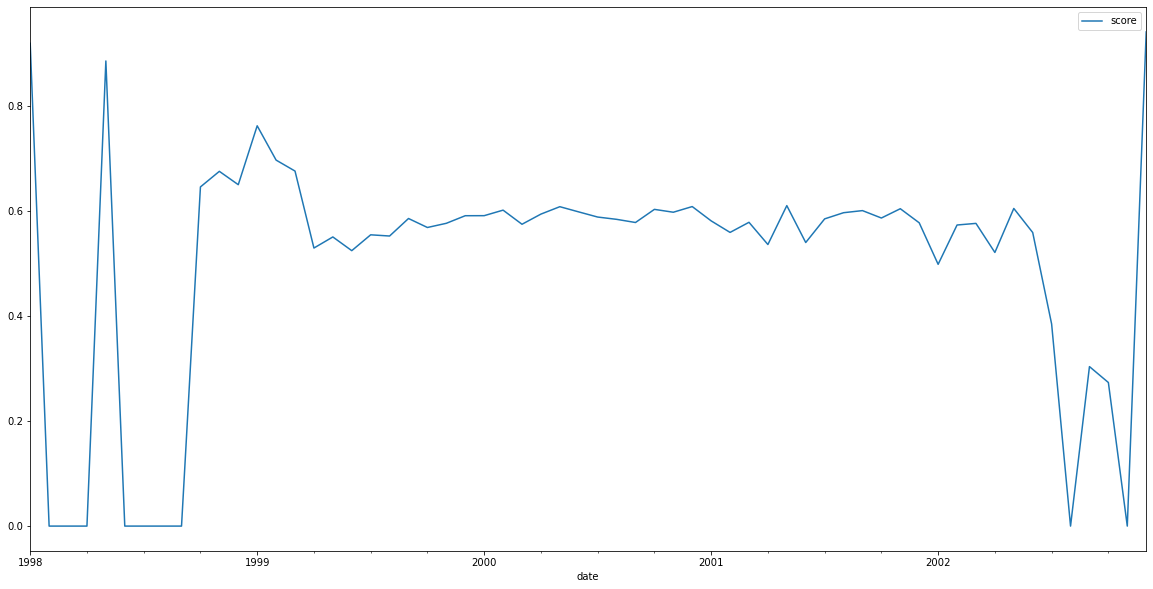

In [12]:
# Resample for Monthly
ts_1m = ts.resample('M').mean().fillna(0)
ts_1m.plot(figsize=(20,10))
ts_1m.head()

In [ ]:
# Resample for Weekly
ts_7d = ts.resample('W').mean().fillna(0)
ts_7d.plot(figsize=(20,10))
ts_7d.head()

In [ ]:
# Resample for Weekly
ts_7d = ts.resample('W').mean().fillna(0)
ts_7d.plot(figsize=(20,10))
ts_7d.head()

score
date                             
1998-01-04 00:00:00+00:00  0.9340
1998-01-05 00:00:00+00:00  0.0000
1998-01-06 00:00:00+00:00  0.9135
1998-01-07 00:00:00+00:00  0.0000
1998-01-08 00:00:00+00:00  0.0000

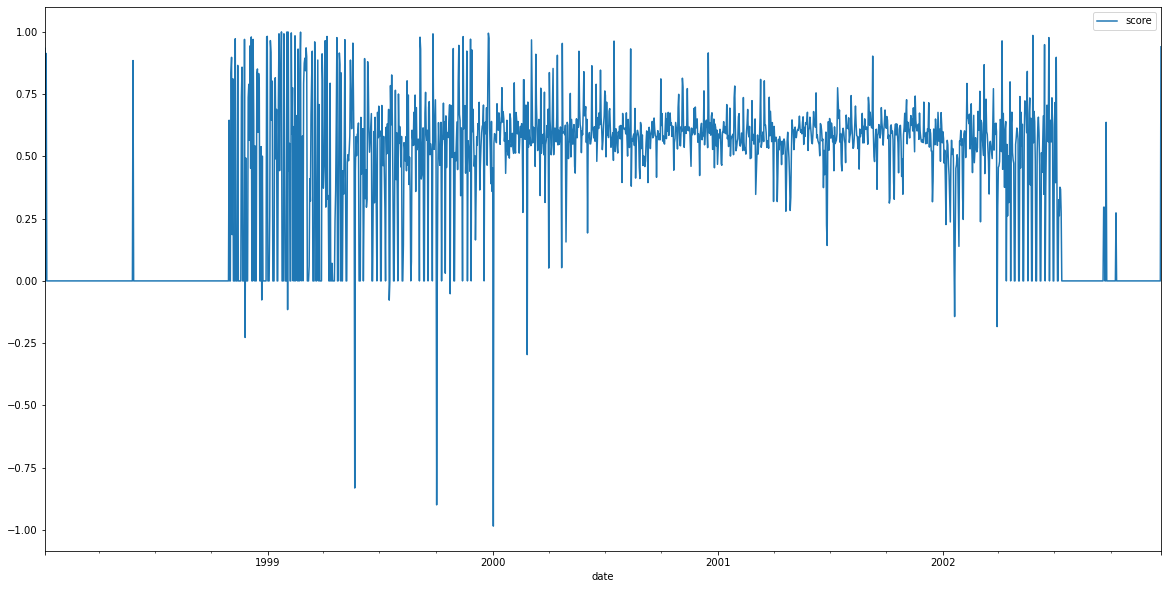

In [13]:
# Resample for Daily with forwad fill
ts_1d = ts.resample('D').mean().fillna(0)
ts_1d.plot(figsize=(20,10))
ts_1d.head()

## Time_Series Combined

## Rolling Average with Null Imputed to Zero

score  rolling_1w  rolling_4w  rolling_12w
date                                                                  
1998-01-04 00:00:00+00:00  0.9340      0.9340    0.000000          0.0
1998-01-11 00:00:00+00:00  0.9135      0.9135    0.000000          0.0
1998-01-18 00:00:00+00:00  0.0000      0.0000    0.000000          0.0
1998-01-25 00:00:00+00:00  0.0000      0.0000    0.461875          0.0
1998-02-01 00:00:00+00:00  0.0000      0.0000    0.228375          0.0

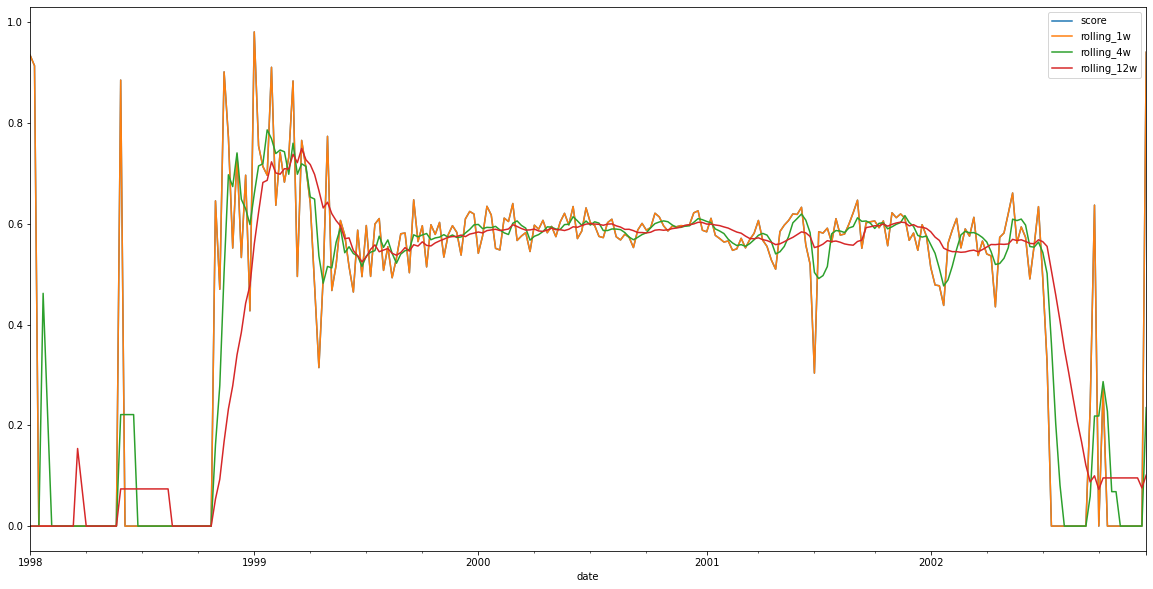

In [15]:
# Rolling Averages
rolling_ts = ts.resample('W').mean().fillna(0).assign(
    rolling_1w=lambda ts: ts.score.rolling(1).mean().fillna(0),
    rolling_4w=lambda ts: ts.score.rolling(4).mean().fillna(0),
    rolling_12w=lambda ts: ts.score.rolling(12).mean().fillna(0),
)
rolling_ts.plot(figsize=(20,10))
rolling_ts.head()

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Top Modeling Using BERTopic

### Libraries
- Install BERTopic with "pip install bertopic
- Install umap with "pip install umap:v

### Above installed libararies didn't work loading/running new dataframe.
- uninstalled libaries usin:
    - pip3 list | grep umap
    - pip3 uninstall umap
    - pip3 uninstall umap-learn
- installed new umap_learn with "pip3 install umap-learn" and it ran
- explains BERTopic: https://hackernoon.com/nlp-tutorial-topic-modeling-in-python-with-bertopic-372w35l9

In [1]:
# BERTopic for Topic Modeling
from bertopic import BERTopic

In [112]:
# umap for reproducability
from umap import UMAP

### Read-in and Prep Data

In [ ]:
# Read in data

In [2]:
df = pd.read_csv('vader_sentiment_lemm.csv', index_col=False)

In [3]:
df.head(1)

Unnamed: 0                   file  \
0           0  allen-p/_sent_mail/1.   

                                             message  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   

                                    date                   sender subject  \
0  Mon, 14 May 2001 16:39:00 -0700 (PDT)  phillip.allen@enron.com     NaN   

                     content                 clean              tokenize  \
0  Here is our forecast\n\n   here is our forecast  here is our forecast   

  stop_words     stemm lemmatize  vader_sentiment_content  \
0   forecast  forecast  forecast                      0.0   

   vader_sentiment_clean  vader_sentiment_lemmatize  
0                    0.0                        0.0

In [97]:
df.isna().sum()

file                0
sender              0
subject         19115
content             0
lemmatize         283
sentiment           0
polarity            0
subjectivity        0
poi                 0
is_internal         0
year                0
dtype: int64

In [98]:
# fill na with blanks from reading in CSV
df = df.fillna('')
df.isna().sum()

file            0
sender          0
subject         0
content         0
lemmatize       0
sentiment       0
polarity        0
subjectivity    0
poi             0
is_internal     0
year            0
dtype: int64

In [ ]:
# Make datetime index from date column
from datetime import timedelta, datetime

# change date column to datetime format
df.date = pd.to_datetime(df.date, utc=True)

# Set Index as date column and sort index
df = df.set_index("date").sort_index()

## Filter DF by POI 

In [99]:
def get_poi_emails(df, f_name, l_name):
    '''
    This function takes in a df, alond with string for first and last names and returns 
    a list of each email from the sender col that contains both the first and last name
    string. Names with common nicknames should be abbrev (ex: Kenneth --> Ken, Daniel --> Dan)
    '''
    
    email_list = df[(df.sender.str.contains(f_name)) & (df.sender.str.contains(l_name))]\
            .sender.value_counts()\
            .index\
            .to_list() 
    
    return email_list

In [100]:
# creating lists for each poi
ken_lay = get_poi_emails(df, 'ken', 'lay')
jeff_skilling = get_poi_emails(df, 'jeff', 'skilling')
kevin_howard = get_poi_emails(df, 'kevin', 'howard')
michael_krautz = get_poi_emails(df, 'michael', 'krautz')
scott_yeager = get_poi_emails(df, 'scott', 'yeager')
joseph_hirko = get_poi_emails(df, 'jo', 'hirko')
rex_shelby = get_poi_emails(df, 'rex', 'shelby')
david_bermingham = get_poi_emails(df, 'dav', 'bermingham')
giles_darby = get_poi_emails(df, 'giles', 'darby')
gary_mulgrew = get_poi_emails(df, 'gary', 'mulgrew')
daniel_bayley = get_poi_emails(df, 'dan', 'bayley')
james_brown = get_poi_emails(df, 'james', 'brown')
robert_furst = get_poi_emails(df, 'rob', 'furst')
william_fuhs = get_poi_emails(df, 'wil', 'fuhs')
richard_causey = get_poi_emails(df, 'ric', 'causey')
christopher_calger = get_poi_emails(df, 'chris', 'calger')
timothy_despain = get_poi_emails(df, 'tim', 'despain')
kevin_hannon = get_poi_emails(df, 'kevin', 'hannon')
mark_koenig = get_poi_emails(df, 'mark', 'koenig')
john_forney = get_poi_emails(df, 'john', 'forney')
kenneth_rice = get_poi_emails(df, 'ken', 'rice')
paula_rieker = get_poi_emails(df, 'paula', 'rieker')
lea_fastow = get_poi_emails(df, 'lea', 'fastow')
andrew_fastow = get_poi_emails(df, 'and', 'fastow')
david_delainey = get_poi_emails(df, 'dav', 'delainey')
ben_glisan = get_poi_emails(df, 'ben', 'glisan')
jeffrey_richter = get_poi_emails(df, 'jeff', 'richter')
larry_lawyer = get_poi_emails(df, 'larry', 'lawyer')
timothy_belden = get_poi_emails(df, 'tim', 'belden')
michael_kopper = get_poi_emails(df, 'mi', 'kopper')
david_duncan = get_poi_emails(df, 'dav', 'duncan')
raymond_bowen = get_poi_emails(df, 'ray', 'bowen')
wesley_colwell = get_poi_emails(df, 'wes', 'colwell')
dan_boyle = get_poi_emails(df, 'dan', 'boyle')
christopher_loehr = get_poi_emails(df, 'chris', 'loehr')

In [101]:
# creating poi list
poi = ken_lay + jeff_skilling + kevin_howard + michael_krautz + scott_yeager + joseph_hirko + rex_shelby + david_bermingham + giles_darby + \
    gary_mulgrew + daniel_bayley + james_brown + robert_furst + william_fuhs + richard_causey + \
    christopher_calger + timothy_despain + kevin_hannon + mark_koenig + john_forney + kenneth_rice + \
    paula_rieker + lea_fastow + andrew_fastow + david_delainey + ben_glisan + jeffrey_richter + larry_lawyer + \
    timothy_belden + michael_kopper + david_duncan + raymond_bowen + wesley_colwell + dan_boyle + christopher_loehr

In [102]:
poi

['kenneth.lay@enron.com',
 'ken.lay-@enron.com',
 'ken.lay@enron.com',
 'ken.lay-.chairman.of.the.board@enron.com',
 'jeff.skilling@enron.com',
 'jeffreyskilling@yahoo.com',
 'kevin_a_howard.enronxgate.enron@enron.net',
 'michael.krautz@enron.com',
 'joehirko@aol.com',
 'rex.shelby@enron.com',
 'rex_shelby@enron.net',
 'james.brown@enron.com',
 'richard.causey@enron.com',
 'christopher.calger@enron.com',
 'tim.despain@enron.com',
 'kevin.hannon@enron.com',
 'mark.koenig@enron.com',
 'john.forney@enron.com',
 'ken.rice@enron.com',
 'ken_rice@enron.net',
 'paula.rieker@enron.com',
 'andrew.fastow@enron.com',
 'david.delainey@enron.com',
 'dave.delainey@enron.com',
 'ben.glisan@enron.com',
 'jeff.richter@enron.com',
 'larry.lawyer@enron.com',
 'tim.belden@enron.com',
 'raymond.bowen@enron.com',
 'wes.colwell@enron.com',
 'dan.boyle@enron.com']

In [ ]:
# # create list of persons of interest (old)
# poi_ls = ['kenneth.lay@enron.com',
#        'ken.lay-@enron.com',
#        'ken.lay@enron.com',
#        'ken.lay-.chairman.of.the.board@enron.com',
       
#       'jeff.skilling@enron.com',
#        'jeffereyskilling@yahoo.com',
       
#       'andrew.fastow@enron.com',
       
#        'lfastow@pop.pdq.net',
#        'lfastow@pdq.net',
       
#       'jefferey.mcmahon@enron.com',
#        'mcmahon@enron.com',
#        'mcmahonm@kochind.com',
#        'gmcmahon@btuwatch.com'
       
       
#       'rick.causey@enron.com',
       
#       'kenneth.rice@enron.com',
#       'ken_rice@enron.net',
#       'ken.rice@enron.com',
#       '-persson@ricemail.ricefinancial.com']

In [13]:
# create poi column for true or false vlaue
df['poi'] = np.where(df.sender.isin(poi), True, False)
df.head(1)

Unnamed: 0                      file  \
date                                                              
1980-01-01 00:00:00+00:00      500017  whalley-g/notes_inbox/1.   

                                                                     message  \
date                                                                           
1980-01-01 00:00:00+00:00  Message-ID: <26478103.1075845469034.JavaMail.e...   

                                           sender  \
date                                                
1980-01-01 00:00:00+00:00  outlook.team@enron.com   

                                                               subject  \
date                                                                     
1980-01-01 00:00:00+00:00  3 - URGENT - TO PREVENT LOSS OF INFORMATION   

                                                                     content  \
date                                                                           
1980-01-01 00:00:00+00:00  Critical Migration Information:\n\n1. Your sch...   

                                                                       clean  \
date                                                                           
1980-01-01 00:00:00+00:00  critical migration information  1 your schedul...   

                                                                    tokenize  \
date                                                                           
1980-01-01 00:00:00+00:00  critical migration information 1 your schedule...   

                                                                  stop_words  \
date                                                                           
1980-01-01 00:00:00+00:00  critical migration information 1 scheduled out...   

                                                                       stemm  \
date                                                                           
1980-01-01 00:00:00+00:00  critic migrat inform 1 schedul outlook migrat ...   

                                                                   lemmatize  \
date                                                                           
1980-01-01 00:00:00+00:00  critical migration information 1 scheduled out...   

                           vader_sentiment_content  vader_sentiment_clean  \
date                                                                        
1980-01-01 00:00:00+00:00                   0.7213                 0.6486   

                           vader_sentiment_lemmatize    poi  
date                                                         
1980-01-01 00:00:00+00:00                     0.6124  False

In [103]:
# Create POI dataframe
poi_df = df[df.poi==True]
poi_df.head(1)

file                sender  \
date                                                                           
1999-06-25 00:00:00+00:00  sager-e/all_documents/3642.  tim.belden@enron.com   

                                    subject  \
date                                          
1999-06-25 00:00:00+00:00  PX Investigation   

                                                                     content  \
date                                                                           
1999-06-25 00:00:00+00:00  I am forwarding a weekly "gossip column" put o...   

                                                                   lemmatize  \
date                                                                           
1999-06-25 00:00:00+00:00  forwarding weekly gossip column put executive ...   

                           sentiment  polarity  subjectivity   poi  \
date                                                                 
1999-06-25 00:00:00+00:00     0.9989  0.095726      0.425933  True   

                           is_internal  year  
date                                          
1999-06-25 00:00:00+00:00         True  1999

### Create DF for POI in 2001

In [104]:
# filter df by year
poi_2001 = poi_df[poi_df.index.year == 2001]
poi_2001.head(1)

file  \
date                                                    
2001-01-01 00:00:00+00:00  delainey-d/_sent_mail/832.   

                                             sender  \
date                                                  
2001-01-01 00:00:00+00:00  david.delainey@enron.com   

                                                subject  \
date                                                      
2001-01-01 00:00:00+00:00  Monterrey Project -- Closing   

                                                                     content  \
date                                                                           
2001-01-01 00:00:00+00:00  Guys, great job on this one.....\n\n 2001 - sh...   

                                                                   lemmatize  \
date                                                                           
2001-01-01 00:00:00+00:00  guy great job one 2001 big year mexico equity ...   

                           sentiment  polarity  subjectivity   poi  \
date                                                                 
2001-01-01 00:00:00+00:00     0.9856  0.399242       0.52684  True   

                           is_internal  year  
date                                          
2001-01-01 00:00:00+00:00         True  2001

In [105]:
poi_2001.shape

(1477, 11)

In [106]:
poi_2001.index.max(), poi_2001.index.min()

(Timestamp('2001-12-29 00:00:00+0000', tz='UTC'),
 Timestamp('2001-01-01 00:00:00+0000', tz='UTC'))

In [107]:
poi_2001.isna().sum()

file            0
sender          0
subject         0
content         0
lemmatize       0
sentiment       0
polarity        0
subjectivity    0
poi             0
is_internal     0
year            0
dtype: int64

In [29]:
# poi_2001.fillna('', inplace=True)
# poi_2001.isna().sum()

# Topic Modeling

## Topic Model with POI for 2001

In [110]:
from bertopic import BERTopic
# umap for reproducability
from umap import UMAP

In [108]:
emails_lemm = list(poi_2001.lemmatize)

In [113]:
# Set UMPAP random_state 42 for reproducability
umap_model = UMAP(n_neighbors=15, n_components=5, 
                  min_dist=0.0, metric='cosine', random_state=42)
topic_model = BERTopic(umap_model = umap_model, language = 'english')

In [114]:
topics, probs = topic_model.fit_transform(emails_lemm)

In [115]:
len(probs)

1477

In [116]:
topic_model.visualize_topics()

In [117]:
topic_model.visualize_hierarchy()

In [118]:
topic_model.get_topic_info()[1:]

Topic  Count                                               Name
1       0     58  0_statement_communication_blockbuster_communic...
2       1     46                            1_beyond_action_20_obsf
3       2     41              2_christopher_02062001_david_02152001
4       3     39                    3_income_balance_ice_commercial
5       4     32                        4_thxs_delainey_regard_thsx
6       5     31                      5_delainey_regard_thanks_note
7       6     28                    6_europe_ee_outsourcing_matthew
8       7     28                         7_20_february_john_turkish
9       8     28             8_anthrax_email_information_suspicious
10      9     27                  9_affiliate_fidelity_guaranty_tva
11     10     27                      10_cdwr_ppa_priority_supplier
12     11     26                            11_epmi_term_total_palo
13     12     26                  12_bcf_assumption_60_communicated
14     13     24                  13_eastern_canada_toronto_managed
15     14     23                       14_jeff_meeting_donahue_know
16     15     22                   15_survey_espeak_ethink_practice
17     16     21         16_larry_01242001_beldenhouectect_overview
18     17     21                  17_ticket_question_debra_employee
19     18     21         18_review_performance_evaluation_completed
20     19     20                       19_steve_02062001_dan_pencil
21     20     20                       20_darwin_award_police_found
22     21     19                 21_california_utility_power_energy
23     22     18                        22_cell_phone_floor_meeting
24     23     18              23_option_janet_confirmation_01292001
25     24     18                   24_laura_finalize_region_central
26     25     18                 25_projection_cash_unit_allocation
29     27     17                  27_credit_market_freeman_proposal
30     26     17                    26_casalestp3doc_fact_sheet_bpa
28     29     17               29_lexi_interview_internship_houston
27     28     17                28_board_lunch_presentation_seminar
32     32     16                                32_dwr_cindy_cpa_hr
33     33     16                      33_electro_discussion_fa_rick
34     34     16          34_joined_dave_originating_congratulating
35     30     16                  30_course_training_people_session
31     31     16             31_holly_corporation_imperial_01172001
36     35     15                             35_puc_dwr_jeff_edison
37     36     15               36_regret_announce_never_resignation
38     37     14           37_dorie_meeting_eric_hitchcockhouectect
39     38     14                    38_jaime_feb_jeff_alatorreenron
40     39     14                     39_document_policy_copy_delete
41     40     14                   40_appeal_court_injunction_uccsu
44     42     13                     42_wish_carla_hoffman_accepted
45     41     13                         41_pope_ron_02212001_david
43     44     13               44_turbine_transfer_ben_westinghouse
42     43     13                    43_chairman_president_enron_ceo
46     45     12                 45_contract_california_governor_ca
47     46     12               46_investment_ena_financial_rotation
48     47     12                               47_anne_nda_demo_ann
49     48     12                      48_assume_review_maffitt_dave
50     49     12                          49_thxs_dave_bearing_kyle
51     50     12                      50_delainey_regard_thsx_milly
52     51     11                    51_school_gift_mccombs_matching
53     52     11                           52_hello_meeting_9am_rex
54     53     11                     53_project_superbowl_chris_7fa
55     54     11                  54_room_saturday_galveston_outing
56     55     10                  55_building_bellaire_ken_02022001

In [ ]:
# model.visualize_barchart()

## Reduce Topcis to Eleven based on Cluster Visual

In [ ]:
# topic_model.reduce_topics(emails_lemm, topics, nr_topics=11)

In [ ]:
# topic_model.get_topic_info()[1:]

In [ ]:
# topic_model.visualize_topics()

In [ ]:
# topic_model.visualize_hierarchy()

## Reduce Topcis to Six based on Hierarchical Clustering

In [122]:
topic_model.reduce_topics(emails_lemm, topics, nr_topics=6)

([-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  2,
  -1,
  -1,
  -1,
  -1,
  0,
  0,
  -1,
  2,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  2,
  -1,
  -1,
  0,
  -1,
  2,
  -1,
  -1,
  -1,
  -1,
  0,
  -1,
  -1,
  -1,
  1,
  -1,
  -1,
  -1,
  1,
  -1,
  0,
  -1,
  -1,
  1,
  -1,
  -1,
  -1,
  1,
  -1,
  -1,
  -1,
  0,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  2,
  1,
  -1,
  -1,
  2,
  -1,
  -1,
  -1,
  1,
  -1,
  2,
  -1,
  -1,
  1,
  1,
  -1,
  -1,
  2,
  -1,
  -1,
  -1,
  2,
  2,
  -1,
  -1,
  -1,
  2,
  2,
  2,
  -1,
  2,
  -1,
  2,
  -1,
  -1,
  -1,
  5,
  5,
  5,
  5,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  0,
  -1,
  -1,
  -1,
  0,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  0,
  -1,
  -1,
  -1,
  -1,
  -1,
  0,
  -1,
  -1,
  -1,
  -1,
  0,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  1,
  3,
  0,
  1,
  -1,
  -1,
  -1,
  2,

In [124]:
topic_model.visualize_topics()

In [123]:
topic_model.visualize_hierarchy()

In [125]:
poi_2001_df = topic_model.get_topic_info()[1:]
poi_2001_df

Topic  Count                                               Name
1      0     99                      0_regard_delainey_thxs_thanks
2      1     74                      1_david_pm_02062001_forwarded
3      2     68                       2_canada_eastern_issue_would
4      3     58  3_statement_communication_communicationsenron_...
5      4     55                     4_course_people_attend_meeting
6      5     46                        5_20_action_beyond_customer

## Get Sentiment Score for Topics

### Install TextBlob with "pip install textblob"

In [47]:
from textblob import TextBlob

In [48]:
def sentiment_scores(string):
    polarity, subjectivity = TextBlob(str(string)).sentiment
    
    return polarity, subjectivity

In [49]:
def add_scores(df, clean_msg_col):
    
    df['polarity, subjectivity'] = df[clean_msg_col].apply(sentiment_scores)
    
    pol = []
    subj = []
    
    for tuple_ in df['polarity, subjectivity']:
        pol.append(list(tuple_)[0])
        subj.append(list(tuple_)[1])
        
    print('polarity and subjectivity algo complete')
    
    df['polarity'] = pol
    df['subjectivity'] = subj
    
    print('added sub and pol to df')
    
    df.drop(columns = ['polarity, subjectivity'], inplace = True)
    
    return df

In [50]:
# run semtiment score function
add_scores(poi_2001_df, 'Name')

polarity and subjectivity algo complete
added sub and pol to df


Topic  Count                                      Name  polarity  \
1      0    228           0_california_power_energy_price       0.0   
2      1    155                   1_david_pm_john_subject       0.0   
3      2    119  2_enron_program_associateanalyst_company       0.0   
4      3     95             3_regard_delainey_thxs_thanks       0.0   
5      4     84              4_document_email_policy_copy       0.0   

   subjectivity  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
5           0.0

In [53]:
average = poi_2001_df.polarity.sum()/len(poi_2001_df)

In [54]:
print('This is the average: ', average)
print('Of this many cluster: ', len(poi_2001_df))

This is the average:  0.0
Of this many cluster:  5


## Topic Modeling on Clean has too many stop words in the top ten

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Explore

## Enron Timeline
- Timeline: https://www.theguardian.com/business/2006/jan/30/corporatefraud.enron
    - 1998: Enron buys Britain's Weessex Water
    - Nov 1999: Enron Online (first global commidty trading platform) launches
    - Aug 2000: Enron shares hit all time high
    - 5 Feb 2001: Arthur Andersen considers not serving Enron due to special partnerships to disguise debt
    - 14 Aug 2001: Jeff Skilling (CEO from 12 Feb 2001) resigns for personal reasons
    - 15 Aug 2001: Sheron Watkins (VP) warns Kenneth Lay (CEO) of question accounting practices
    - 24 Oct 2001: Andrew Fastow (CFO) is fired
    - 8 Nov 2001: Enron announced it overstated profits by 60M going back to 1997
    - 2 Dec 2001: Enron files for bankruptsy
    - 3 Dec 2001: Eron lays off 4K employees 
    - 9 Jan 2002: Justice Department investigates Enron
    - 24 Jan 2002: Kenneth Lay (CEO) resigns
    - 14 Mar 2002: Arthur Andersen indicted 
    - 31 Oct 2002: Fastow indicted

## Questions to Explore:

- Question 1: How many messages were forwarded?
- Question 2: Did certain individuals forward more messages than others?
- Question 3: What messages were forwarded the most?
- Question 4: Were there any trends in messages with blind carbon copy recipients?/with certain blind carbon copy recipients?
- Question 5: Who were the top 5 / low 5 sentiment scores?
- Question 6: What department had the lowest average sentiment score?

In [21]:
df = pd.read_csv('clean.csv', index_col=0)
df.head(1)

date                   file                   sender subject  \
0  2001-05-14  allen-p/_sent_mail/1.  phillip.allen@enron.com     NaN   

                     content lemmatize  sentiment  polarity  subjectivity  \
0  Here is our forecast\n\n   forecast        0.0       0.0           0.0   

     poi  is_internal  year  
0  False         True  2001

In [31]:
# Make datetime index from date column
from datetime import timedelta, datetime

# change date column to datetime format
df.date = pd.to_datetime(df.date, utc=True)

# Set Index as date column and sort index
df = df.set_index("date").sort_index()

In [33]:
df.head(1)

file               sender  \
date                                                               
1997-01-01 00:00:00+00:00  love-p/inbox/40.  laurinh@prodigy.net   

                                   subject  \
date                                         
1997-01-01 00:00:00+00:00  item#1065594740   

                                                                     content  \
date                                                                           
1997-01-01 00:00:00+00:00  \nIt's clear the Ebay made the error in this  ...   

                                                                   lemmatize  \
date                                                                           
1997-01-01 00:00:00+00:00  ' clear ebay made error matter forthcoming how...   

                           sentiment  polarity  subjectivity    poi  \
date                                                                  
1997-01-01 00:00:00+00:00     0.5267       0.2      0.516667  False   

                           is_internal  year  
date                                          
1997-01-01 00:00:00+00:00        False  1997

In [32]:
df.index.dtype

datetime64[ns, UTC]

In [34]:
df.shape

(516796, 11)

In [35]:
df.index.min(), df.index.max()

(Timestamp('1997-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2002-12-21 00:00:00+0000', tz='UTC'))

## What is the pairplot info?

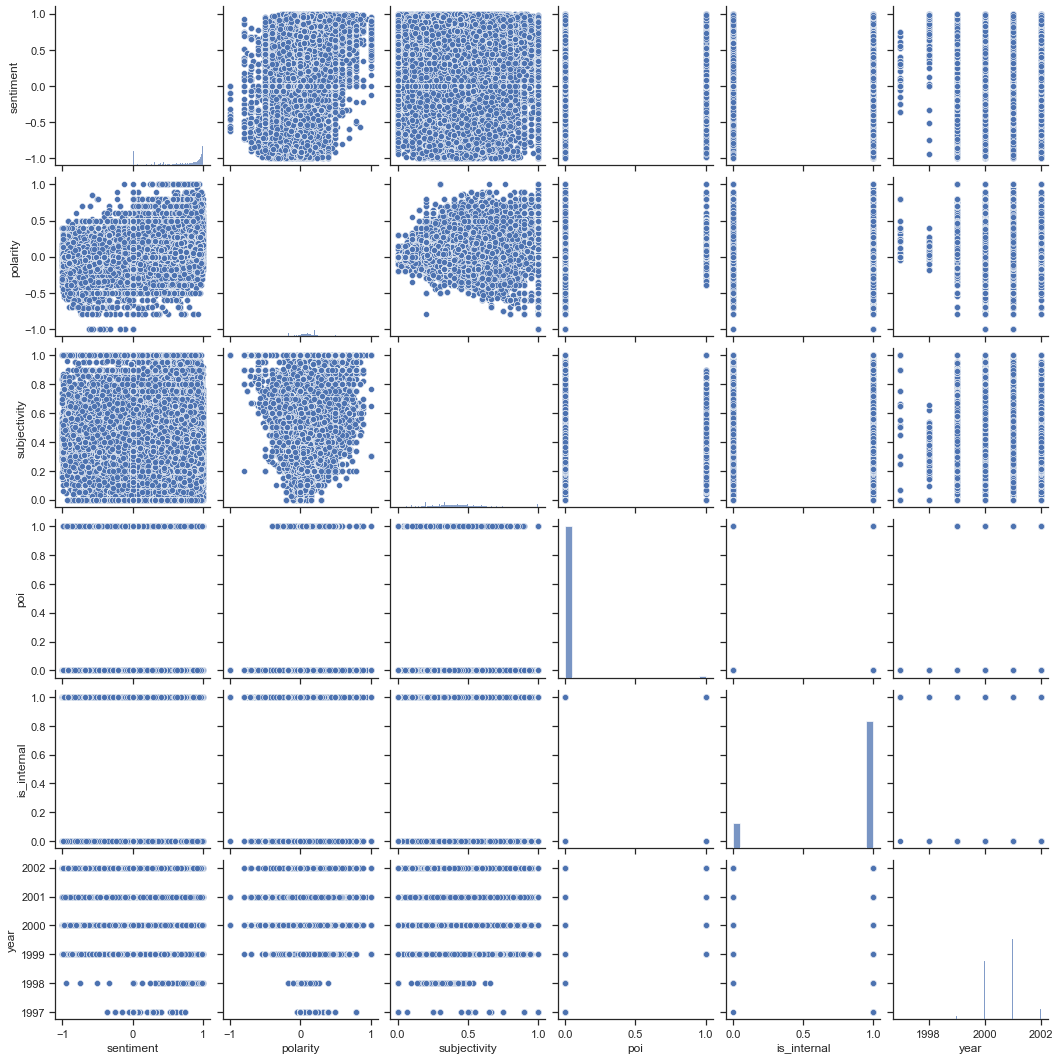

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)
sns.pairplot(df)
plt.show()

### Notes:
- Relationship between polarity and subjectivity: Polarity increases with increased subjectivity.

## What is the corelation between sentiment and other features?

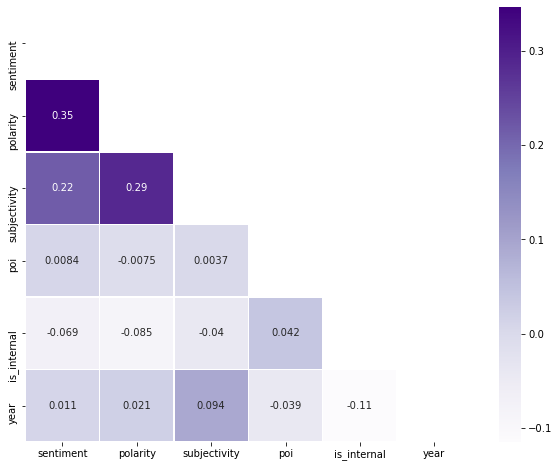

In [25]:
# Creat correlation table and heatmap
corr_table =  df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_table, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(corr_table))
plt.show()

### Notes:
- Highest correlatoin with polority and sentiment which makes sense since they evalueate the same thing
- Next Highest correlation is with polarity and subjectivity
- Next highest correlation is with sentiment and subjectivity.  

## What is the relationship between intsensity and date hued by is_internal?

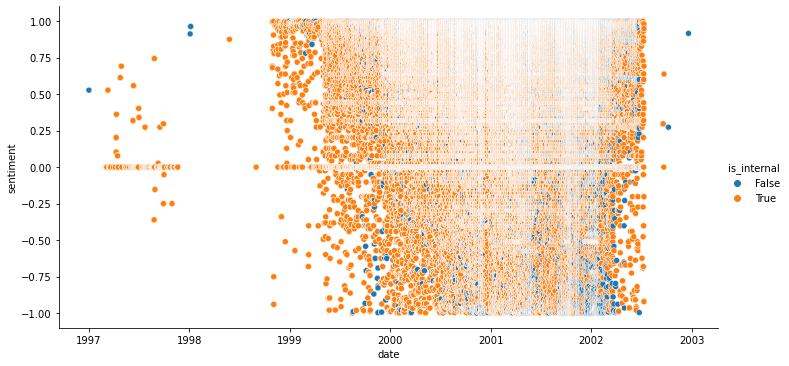

In [36]:
# Relplot for intensity and date hued by is_internal
sns.relplot(data=df, x=df.index , y='sentiment', hue='is_internal', kind='scatter',  height=5, aspect=2)

### Notes:
- Nothing significant found. Need to seperate data more

## What is the relationship between intensity and date hued by POI and col'd by is_internal?

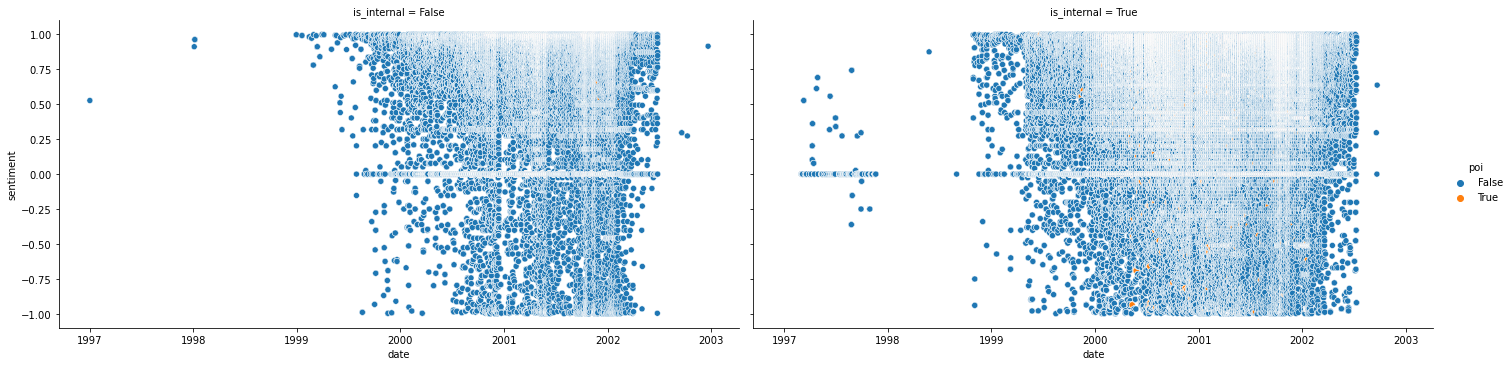

In [47]:
# Relplot for intensity and date hued by is_internal
sns.relplot(data=df, x=df.index , y='sentiment', hue='poi', col='is_internal', kind='scatter',  height=5, aspect=2)

### Notes:
- Nothing significant. Need to seperate more data.

## What is the relationship between polarity and subjectivity

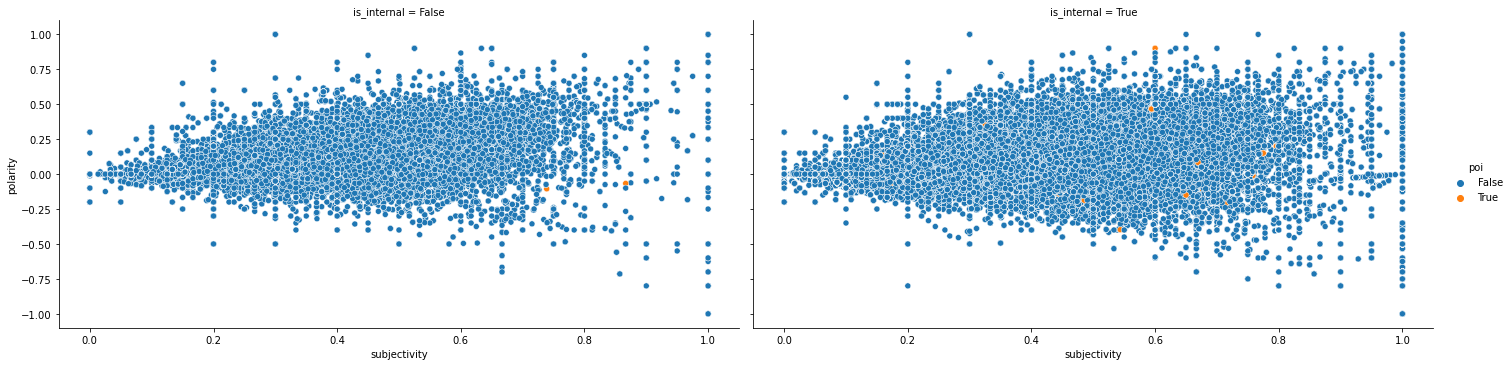

In [40]:
# Relplot for intensity and date hued by is_internal
sns.relplot(data=df, x='subjectivity' , y='polarity', hue='poi', col='is_internal', kind='scatter',  height=5, aspect=2)

### Notes:
- Nothing sigficant

## What is the relationship between polarity and subjectivity with internal and external emails seperated by POI and Non-POI?

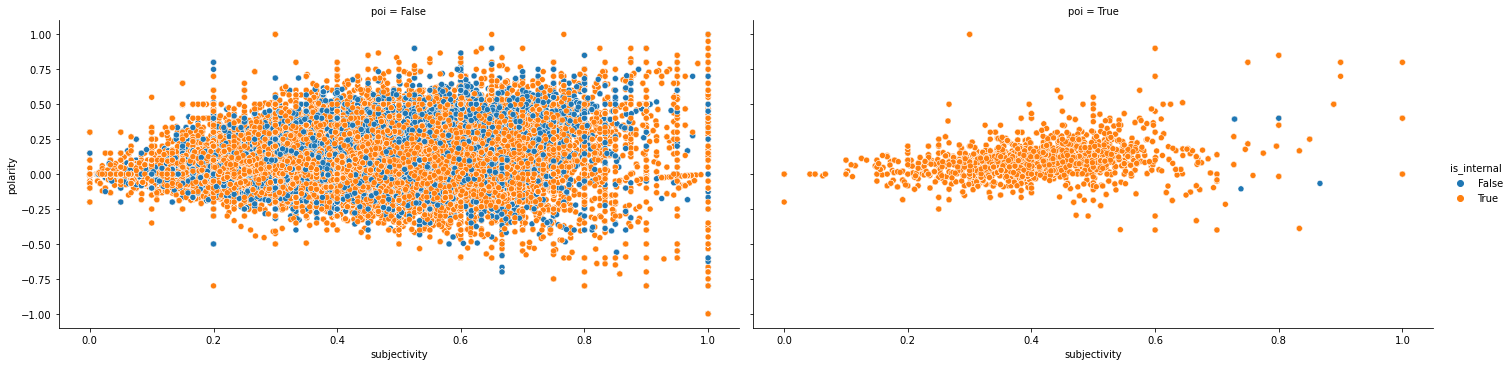

In [42]:
# Relplot for polarity and subjectivity hued by is_internal
sns.relplot(data=df, x='subjectivity' , y='polarity', hue='is_internal', col='poi', kind='scatter',  height=5, aspect=2)

### Notes:
- POI have most internal emails
- POI email subjectivity are mostly middle to low (.2-.6)
- POI email polarity are mostly neutral range

## What is the relationship between intensity and subjectivity with internal and external emails seperated by POI and Non-POI?

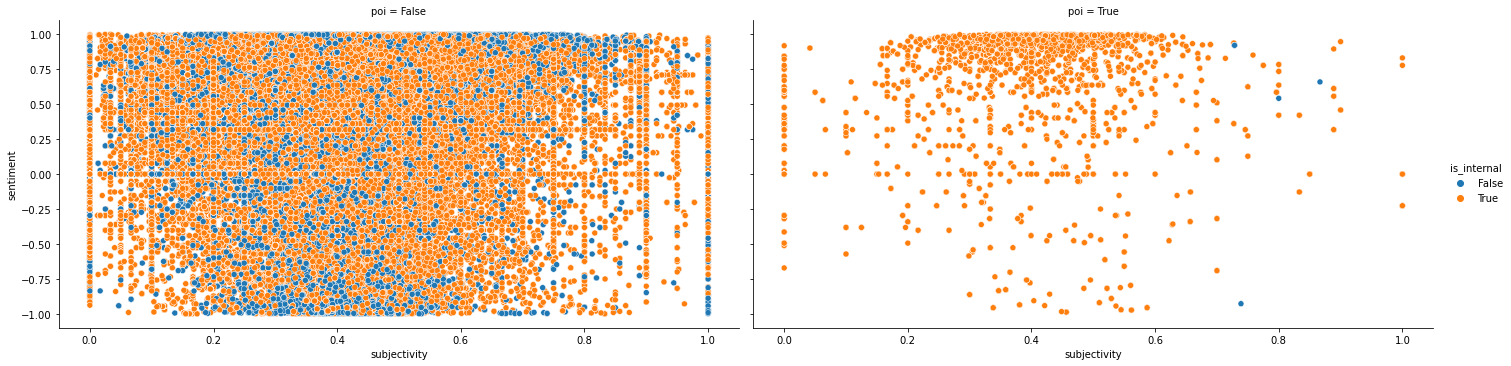

In [43]:
# Relplot for intensity and subectivity hued by is_internal
sns.relplot(data=df, x='subjectivity' , y='sentiment', hue='is_internal', col='poi', kind='scatter',  height=5, aspect=2)

### Notes:
- POI have mostly internal emails
- POI email subjectivity are mostly middle to low (.2-.6)
- POI email intensity are mostly positive

## What is the relationship between polarity and date hued by POI and col'd by is_internal? 

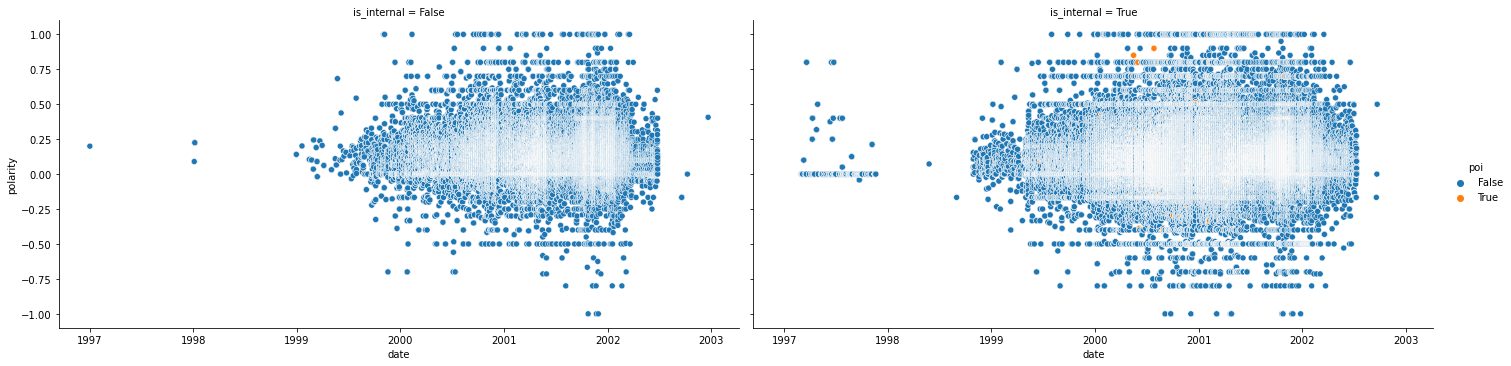

In [46]:
# Relplot for intensity and subectivity hued by is_internal
sns.relplot(data=df, x=df.index , y='polarity', hue='poi', col='is_internal', kind='scatter',  height=5, aspect=2)

### Notes:
- Nothing Significant 

## What is the difference bewtween instensity scores and polarity scores for POI internal email over time?

In [50]:
# subgroup df for poi==True and is_internal==True
poi_internal = df[(df.poi==True) & (df.is_internal==True)]

In [51]:
# 4,488 emails in the poi-internal subgroup
poi_internal.shape

(4488, 11)

In [59]:
# groupby subject to find 1,230 subjects with max email 4 to top subject. What is Doorstep Reviews?a
poi_internal.groupby('subject').count()[['file']]

file
subject                            
"Doorstep Reviews" - EES          4
"Richochet" Schedules             3
"The Pulse" Employee Survey       4
"Total Transfer Capabilities"     9
08/02 Dinner                      4
...                             ...
position                          2
presentation                      4
tax person                        1
test                              1
turbine swap                      1

[1230 rows x 1 columns]

In [87]:
poi_internal.head(1)

file                sender  \
date                                                                           
1999-06-25 00:00:00+00:00  sager-e/all_documents/3642.  tim.belden@enron.com   

                                    subject  \
date                                          
1999-06-25 00:00:00+00:00  PX Investigation   

                                                                     content  \
date                                                                           
1999-06-25 00:00:00+00:00  I am forwarding a weekly "gossip column" put o...   

                                                                   lemmatize  \
date                                                                           
1999-06-25 00:00:00+00:00  forwarding weekly gossip column put executive ...   

                           sentiment  polarity  subjectivity   poi  \
date                                                                 
1999-06-25 00:00:00+00:00     0.9989  0.095726      0.425933  True   

                           is_internal  year  
date                                          
1999-06-25 00:00:00+00:00         True  1999

In [89]:
poi_internal_pol = poi_internal[['polarity']]
poi_internal_pol.head(1)

polarity
date                               
1999-06-25 00:00:00+00:00  0.095726

In [90]:
# resma
poi_internal_pol_resamp = poi_internal_pol.resample('M').mean().fillna(0)
poi_internal_pol_resamp.head(1)

polarity
date                               
1999-06-30 00:00:00+00:00  0.095726

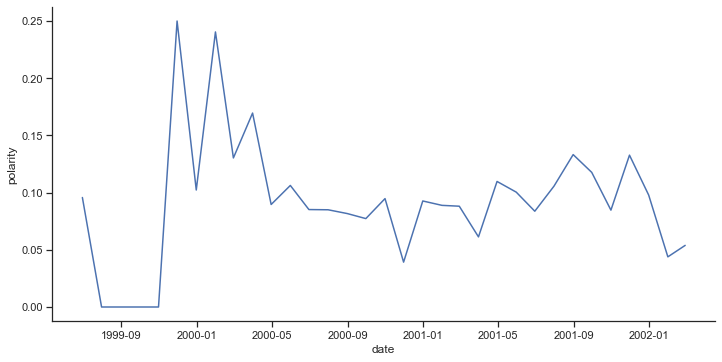

In [93]:
# Relplot for intensity and date hued by is_internal
sns.relplot(data=poi_internal_pol_resamp, x=poi_internal_pol_resamp.index , y='polarity', kind='line',  height=5, aspect=2)

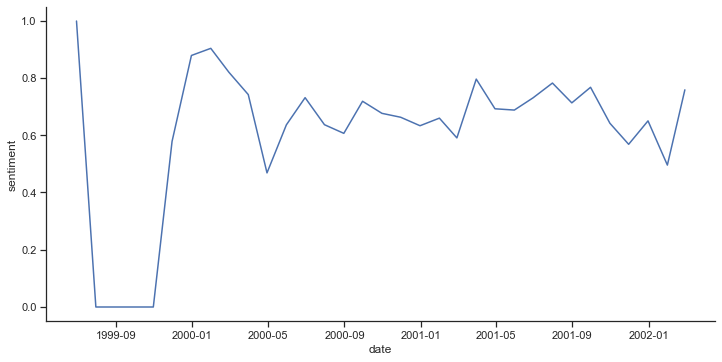

In [94]:
poi_internal_sent = poi_internal[['sentiment']]
poi_internal_sent_resamp = poi_internal_sent.resample('M').mean().fillna(0)
# Relplot for intensity and date hued by is_internal
sns.relplot(data=poi_internal_sent_resamp, x=poi_internal_sent_resamp.index , y='sentiment', kind='line',  height=5, aspect=2)

<Figure size 1440x720 with 0 Axes>

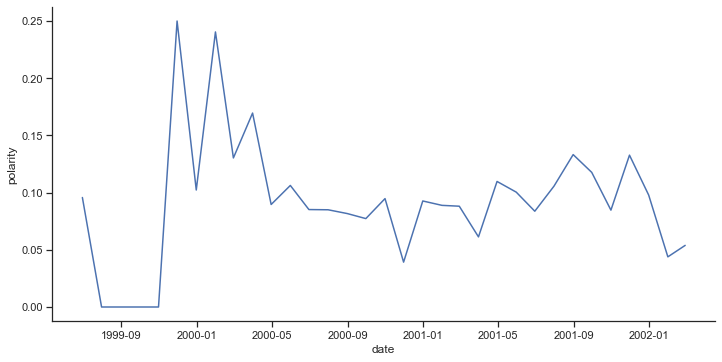

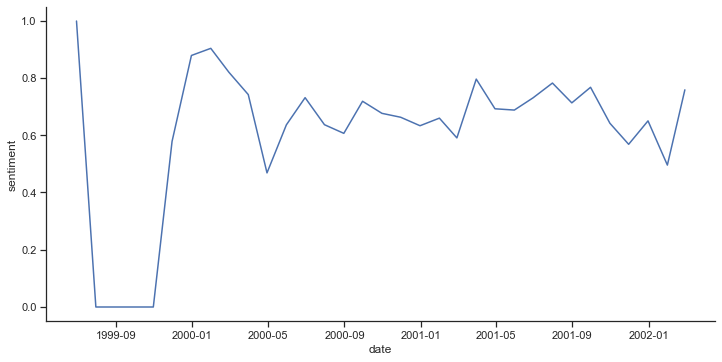

In [96]:
plt.figure(figsize=(20,10))
# Relplot for poi_internal email polarityovertime
sns.relplot(data=poi_internal_pol_resamp, x=poi_internal_pol_resamp.index , y='polarity', kind='line',  height=5, aspect=2)
# Relplot for poi_internal instensity overtime
sns.relplot(data=poi_internal_sent_resamp, x=poi_internal_sent_resamp.index , y='sentiment', kind='line',  height=5, aspect=2)

In [71]:
poi_internal_polarity = poi_internal[["polarity"]]

In [79]:
poi_internal_polarity_rolling = poi_internal_polarity.resample('W').mean().fillna(0).rolling(4).mean().fillna(0)
poi_internal_polarity_rolling

polarity
date                               
1999-06-27 00:00:00+00:00  0.000000
1999-07-04 00:00:00+00:00  0.000000
1999-07-11 00:00:00+00:00  0.000000
1999-07-18 00:00:00+00:00  0.023932
1999-07-25 00:00:00+00:00  0.000000
...                             ...
2002-01-13 00:00:00+00:00  0.058747
2002-01-20 00:00:00+00:00  0.049280
2002-01-27 00:00:00+00:00  0.049564
2002-02-03 00:00:00+00:00  0.052099
2002-02-10 00:00:00+00:00  0.074386

[138 rows x 1 columns]

In [81]:
# Relplot for intensity and date hued by is_internal
sns.relplot(data=poi_internal_polarity_rolling, x=df.index , y='polarity', kind='scatter',  height=5, aspect=2)

ValueError: Length of DatetimeIndex vectors must match length of `data` when both are used, but `data` has length 138 and the vector passed to `x` has length 516796.

polarity  rolling_4w
date                                           
1999-06-27 00:00:00+00:00  0.095726    0.000000
1999-07-04 00:00:00+00:00  0.000000    0.000000
1999-07-11 00:00:00+00:00  0.000000    0.000000
1999-07-18 00:00:00+00:00  0.000000    0.023932
1999-07-25 00:00:00+00:00  0.000000    0.000000

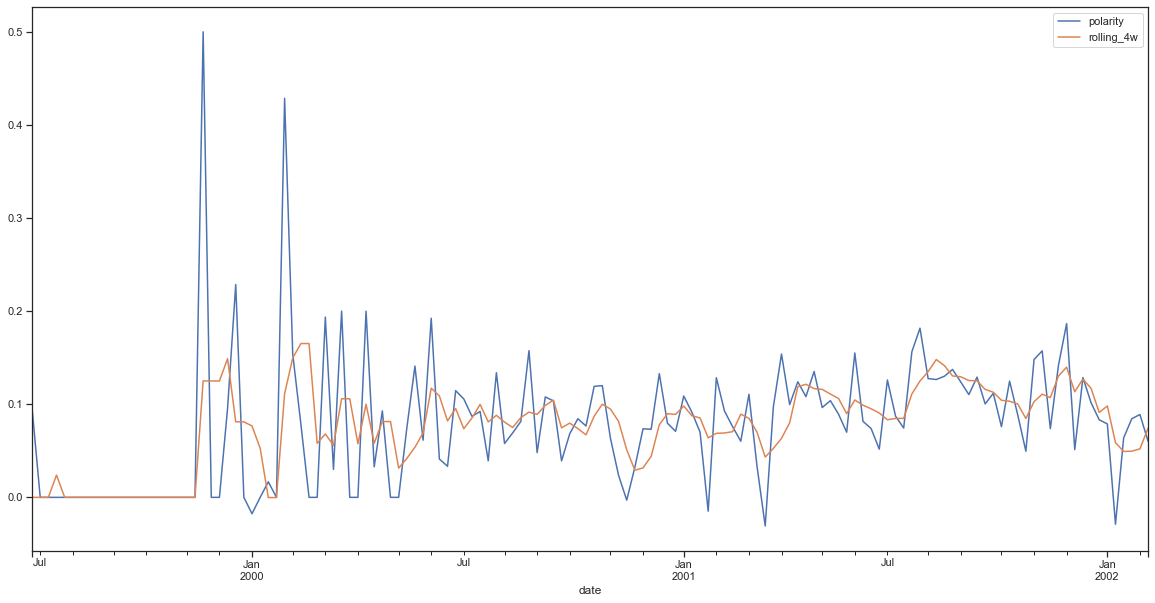

In [73]:
# Rolling Averages
rolling_poi_internal = poi_internal_polarity.resample('W').mean().fillna(0).assign(
    rolling_4w_polarity=lambda poi_internal_polarity: poi_internal_polarity.rolling(4).mean().fillna(0),
)
rolling_poi_internal.plot(figsize=(20,10))
rolling_poi_internal.head()

In [60]:
# Relplot for intensity and date hued by is_internal
sns.relplot(data=rolling.poi_internal, x=df.index , y='sentiment', kind='scatter',  height=5, aspect=2)

ValueError: Length of DatetimeIndex vectors must match length of `data` when both are used, but `data` has length 4488 and the vector passed to `x` has length 516796.

## Visualizations and Statistical Testing
- For the statistical testing done on questions 3 and 4 the significance level equals 0.05.

## Exploration Summary:
- ???

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Model (Not Used for Project)

## Pre-Process

### TD_IDF

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer()
# tfidfs = tfidf.fit_transform(df.values())
# tfidfs

In [ ]:
# pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())

## Model

### Prep for Prophet

In [ ]:
# see train_ts
train_ts.head()

In [ ]:
# filter train_ts to include only sentiment for modeling
train_tss = train_ts[['sentiment']]
train_tss.head()

In [ ]:
# train_tss_4wr
train_tssr1d = train_tss.resample('D').mean().fillna(0)
train_tssr1d.head()

In [ ]:
train_tssr1d.index.dtype

In [ ]:
# remove timezone for ds column
train_tssr1d = train_tssr1d.tz_convert(None)
train_tssr1d.index.dtype

In [ ]:
train_tssr1d.head()

In [ ]:
train_tssrr1d = train_tssr1d.rolling(30).mean().fillna(0).reset_index().rename(columns={'date':'ds','sentiment':'y'})
train_tssrr1d.head()

In [ ]:
train_tssrr1d.info()

### Facebook Prophet

In [ ]:
from prophet import Prophet

# create prophet object
m = Prophet()

# fit prophet object to df with datetime and continuous value
m.fit(train_tssrr1d)

In [ ]:
# create a fit dataframe that include 365 days into the future. this will be used to make a prediction
future = m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
fcst = m.predict(future)
fcst[['ds','yhat','yhat_lower','yhat_upper']].tail()

In [ ]:
fcst.head()

In [ ]:
viz_1 = Prophet.plot(m, fcst)
viz_1

In [ ]:
# Plot forecast components like trend, yearly seasonality, and weekly seasonality of the time series
viz_2 = m.plot_components(fcst)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

import plotly.graph_objs as go
from plotly.subplots import make_subplots

import plotly.offline as py
py.init_notebook_mode()

In [ ]:
plot_components_plotly(m, fcst)

## Baseline

## Model 1: 

## Model 2: 

## Model 3: 

## Evaluation

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Conclusion </br>
## Summary:
- ???

## Recommendation:
- ???

## Next Steps:
- ???

## Load Pickle

In [ ]:
import pickle
pickle_file = open("eron_data", "rb")
objects = []
while True:
    try:
        objects.append(pickle.load(pickle_file))
    except EOFError:
        break
pickle_file.close()

print(objects)